<a href="https://colab.research.google.com/github/ljs2021/Machine-Learning-Book-/blob/master/7%EC%A3%BC%EC%B0%A8_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ensemble 

> '조화'라는 사전적 의미를 지님 

## Ensemble Learning

> 여러 개의 기본모델을 활용하여 하나의 새로운 모델을 만들어내는 개념 

## Ensemble Learing의 종류

> Bagging : 모델을 다양하게 만들기 위해 데이터를 재구성 

> RandomForest : 모델을 다양하게 만들기 위해 데이터 뿐만 아니라,변수도 재구성 

> Boosting:맞추기 어려운 데이터에 대해 좀더 가중치를 두어 학습하는개념 (Adaboost,Gradient boosting(Xgboost,LightGBM,Catboost)

> stacking : 모델의 output값을 새로운 독립변수로 사용 



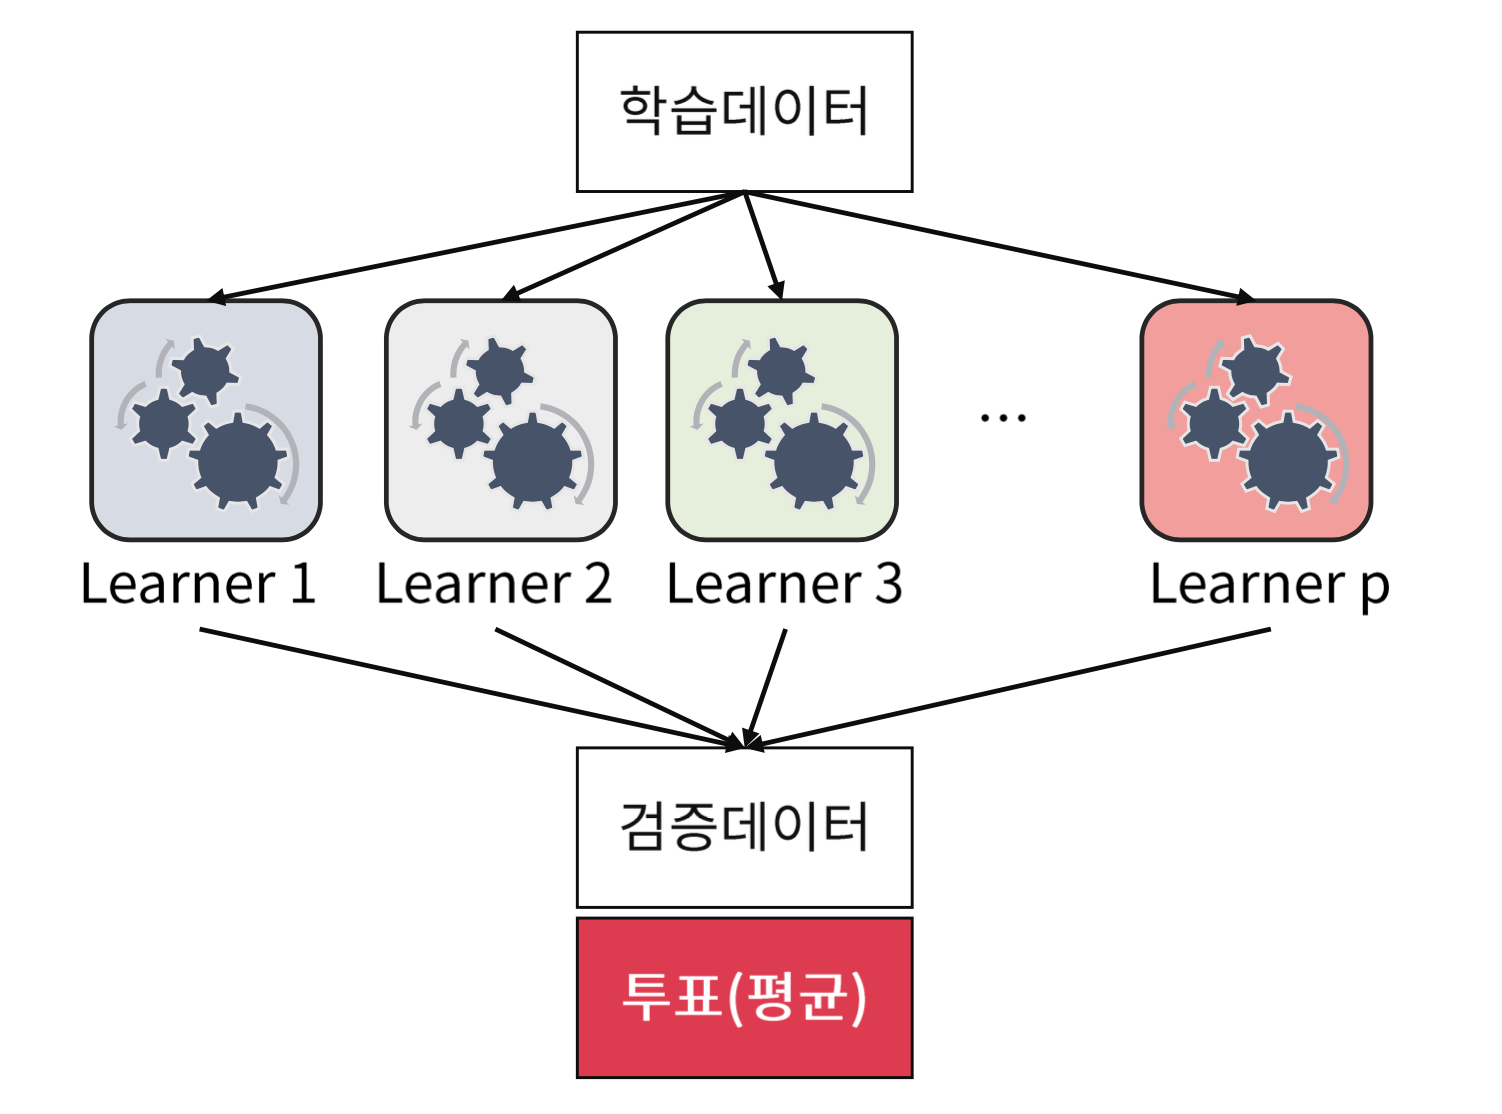

## Voting 

> Hard voting 

> Soft Voting 

In [ ]:
#Voting Classifier (KNN,Logistic regression)

import pandas as pd 

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data_df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft')

X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=777)

#VotingClassifier 학습/예측 
vo_clf.fit(X_train,y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도 : {:.4f}".format(accuracy_score(y_test,pred)))

#개별 모델의 학습/예측 
classifiers = [lr_clf , knn_clf]
for classifier in classifiers:
  classifier.fit(X_train,y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print("{}정확도 : {:.4f}".format(class_name,accuracy_score(y_test,pred)))

Voting 분류기 정확도 : 0.9561
LogisticRegression정확도 : 0.9298
KNeighborsClassifier정확도 : 0.9386


## Random Forest

> Random Forest는 개별적인 분류기의 기반 알고리즘은 DecisionTree 이지만 개별 tree가 학습하는 데이터는 전체 데이터에서 일부가 중첩되게 샘플링된 데이터세트 **(복원 추출)**




In [ ]:
import pandas as pd

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                           if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 feature명을 새롭게 수정하는 get_new_feature_name_df()를 이용하여 새로운 feature명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset( )을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


**Random Forest hyper parameter**

> n_estimators : 랜덤 포레스트에서 결정트리의 개수를 지정 default :10

> max_features : 최적의 분할을 위해 고려할 최대 피처 개수 default none (데이터 세트의 모든 피처를 사용해 분할 수행) ,decisiontree와 동일 하지만 sqrt(전체피처개수) 만큼 참조 

> max_depth , min_samples_leaf등 decisiontree에서 과적합을 개선하기 위해 사용되는 파라미터도 동일하게 적용.

In [ ]:
#GridSearchCV를 이용해 런덤 포레스트의 하이퍼 파라미터 튜닝 

from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100],
          'max_depth':[6,8,10,12],
          'min_samples_leaf':[8,12,18],
          'min_samples_split':[8,16,20]
          }
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행 

# n_jobs=-1 > 모든 cpu코어 사용 
rf_clf = RandomForestClassifier(random_state=0,n_jobs=-1)
grid_cv = GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

print("최적의 하이퍼 파라미터:\n",grid_cv.best_params_)
print("최고 예측 정확도{:.4f}".format(grid_cv.best_score_))




최적의 하이퍼 파라미터:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도0.9180


In [ ]:

rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9165


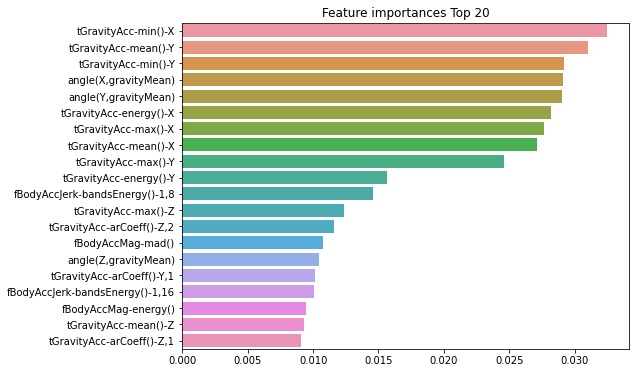

In [ ]:
#개별 feature들의 중요도 시각화 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()

## GBM(Gradient Boosting Machine)

> Ada Boost(Adaptive boosting) : 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘 

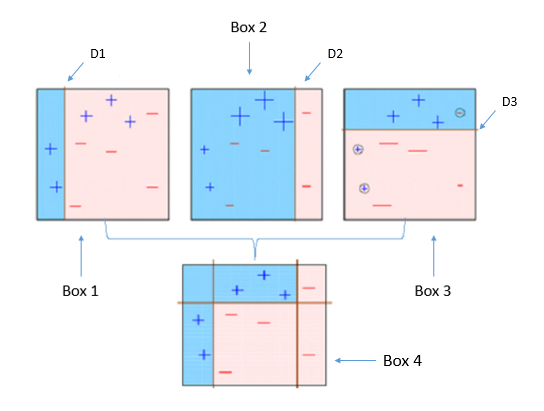

GBM도 Ada Boost와 유사하나, 가중치 업데이트를 Gradient Descent을 이용하는 것이 큰 차이.

Gradient Descent : 오류식 h(x) = u- F(x)를 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는것 
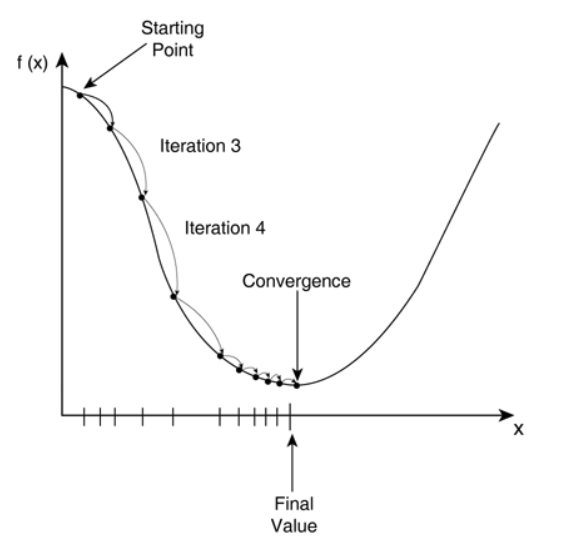

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = get_human_dataset()

#GBM 수행 시간 측정을 위함.시작 시간 설정 
start_time = time.time()
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test,pred)

print("GBM 정확도 : {:.4f}".format(gb_accuracy))
print("GBM 수행시간 : {:.1f}초".format(time.time()-start_time))

NameError: ignored

## GBM 하이퍼 파라미터 및 튜닝 

> loss : 경사 하강법에서 사용할 비용 함수를 지정. default : deviance

> learning_rate : GBM이 학습을 진행 할때 마다 적용하는 학습률

> n_estimator : weak learner의 개수 default 100

> subsample : weak learner가 학습에 사용하는 데이터의 샘플링 비율 default 1

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1,n_jobs=-1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
scores_df = pd.DataFrame(grid_cv.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
'split0_test_score', 'split1_test_score']]

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행. 
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

## XGBoost(eXtra Gradient Boost)

GBM에 기반하고 있지만 GBM의 느린 시간 및 과적합 규제부재 등의 문제를 해결.


**XGBoost 하이퍼 파라미터 **

> 일반 파라미터 : 일반적으로 실행 시 스레드의 개수나 silent모드등의 선택을 위한 파라미터.(default 거의 안바꿈)

> 부스터 파라미터 : 트리 최적화,부스팅 , regularization 등과 관련 파라미터 지칭 (대부분의 하이퍼 파라미터)

>학습 태스크 파라미터 : 학습 수행 시의 객체 함수,평가를 위한 지표 등을 설정하는 파라미터 

파이썬 래퍼        /          사이킷런 래퍼


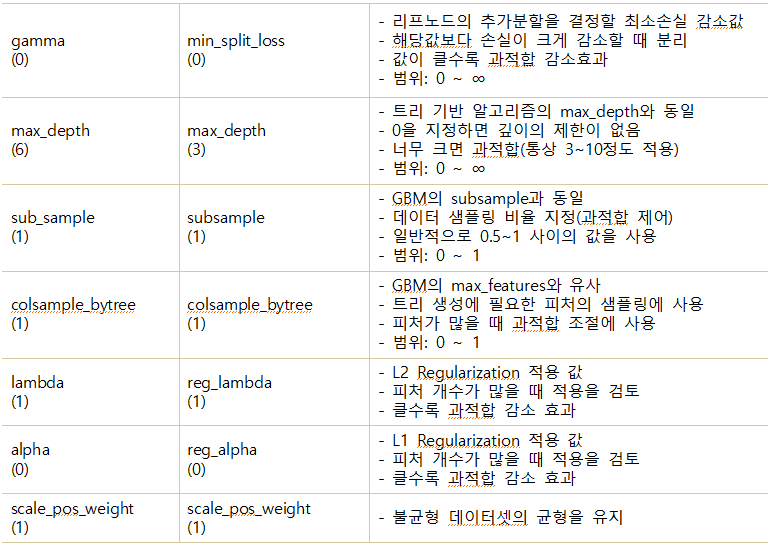

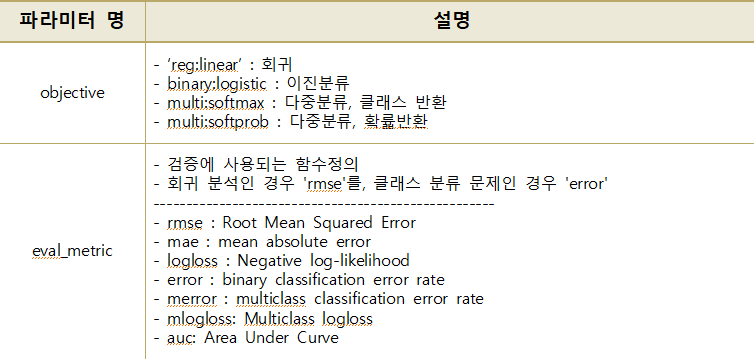

if) 과적합이 심하면?

> eta(learning rate)값을 낮춘다. eta값을 낮출경우 num_round(n_estimators)는 반대로 높여줘야 한다. 

> max_depth 값 낮춘다.

> min_child_weight 값을 높입니다.

> gamma 값을 높입니다.

> subsample과 colsample_bytree를 조정하는 것도 트리가 너무 복잡하게 생성되는 것을 막아 과적합 문제에 도움이 될수 있다. 

In [ ]:
import xgboost

print(xgboost.__version__)

0.90


In [4]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features=dataset.data
y_label = dataset.target 
cancer_df = pd.DataFrame(data=X_features,columns=dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_features,y_label,test_size=0.2,random_state=777)
print(X_train.shape,X_test.shape)

(455, 30) (114, 30)


파이썬 래퍼 XGBoost는 사이킷런과 차이가 여러 가지 있지만 가장 큰 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 DMatrix를 생성 

DMatrix는 넘파이 외에 libsvm txt포맷 파일, xgboost 이진 버퍼 파일을 파라미터로 입력받아 변환 할 수 있다. 판다스의 DataFrame으로 데이터 인터페이스 하기 위해서는 DataFrame.values를 이용해 넘파이로 일차 변환한 뒤에 이를 이용해 DMatrix 변환을 적용.

In [7]:
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)

**XGBoost의 하이퍼 파라미터 ** (주로 디셔너리 형태)

> max_depth(트리 최대깊이 3)

> 학습률 eta :0.1

> 예제 데이터가 0 or 1 이진 분류이므로 목적함수(objective)는 이진 로지스틱(binary:logistic)

> 오류 함수의 평가 성능 지표는 logloss

> num_rounds(부스팅 반복 횟수)는 400회

> 오류함수의 성능 개선이 없을 경우 조기 중단할 수 있는 최소 반복횟수(early_stoppings) :100회



In [10]:
params={
    'max_depth':3,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}

num_rounds=400
#early_stopping_rounds 파라미터를 설정해 조기 중단을 수행하기 위해서는 바드시 eval_set과 eval_metric가 함께 설정돼야 한다. 
#eval_set은 성능 평가를 수행할 평가용 데이터 세트를 설정 
#eval_metric는 평가 세트에 적용할 성능 평가 방법 
#XGBoost는 반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측오류를 평가 한다. 

주어진 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달하고 학습 

In [11]:
#train 데이터 세트는 'train',evaluation(test)데이터 세트는 'eval'로 명기 

wlist = [(dtrain,'train'),(dtest,'eval')]

#하이퍼 파라미터와 early stopping 파라미터를 train()함수의 파라미터로 전달 

xgb_model = xgb.train(params=params,dtrain=dtrain,num_boost_round=num_rounds,evals=wlist)

[0]	train-logloss:0.465052	eval-logloss:0.504334
[1]	train-logloss:0.331613	eval-logloss:0.394101
[2]	train-logloss:0.245953	eval-logloss:0.318297
[3]	train-logloss:0.187294	eval-logloss:0.284256
[4]	train-logloss:0.145106	eval-logloss:0.25513
[5]	train-logloss:0.11575	eval-logloss:0.230772
[6]	train-logloss:0.093305	eval-logloss:0.210451
[7]	train-logloss:0.076	eval-logloss:0.206268
[8]	train-logloss:0.063929	eval-logloss:0.201064
[9]	train-logloss:0.053599	eval-logloss:0.195055
[10]	train-logloss:0.046195	eval-logloss:0.186454
[11]	train-logloss:0.039916	eval-logloss:0.183188
[12]	train-logloss:0.034726	eval-logloss:0.177375
[13]	train-logloss:0.031032	eval-logloss:0.178565
[14]	train-logloss:0.027885	eval-logloss:0.176999
[15]	train-logloss:0.024919	eval-logloss:0.177424
[16]	train-logloss:0.022741	eval-logloss:0.180725
[17]	train-logloss:0.020849	eval-logloss:0.178687
[18]	train-logloss:0.01885	eval-logloss:0.175962
[19]	train-logloss:0.017506	eval-logloss:0.176032
[20]	train-loglo

train()으로 학습을 수행하면 반복 시 train-error 와 eval-logloss가 지속적으로 감소.
예측을 위해 predict()사용 .

사이킷런의 predict()메서드는 예측 결과 클래스값(0,1)을 반환 하지만 XGBoost의 predict()는 예측 결괏값이 아닌 예측 결과를 추정할 수 있는 확률 값 반환.

In [13]:
#0.5보다 크면 1 그렇지 않으면 0으로 예측하는 로직 추가

pred_probs=xgb_model.predict(dtest)
print("predict()수행 결괏값을 10개만 표기,예측 확률값으로 표시됨됨")
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1,그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장 
preds = [1 if x >0.5 else 0 for x in pred_probs]
print("예측값 10개만 표시 :",preds[:10])

predict()수행 결괏값을 10개만 표기,예측 확률값으로 표시됨됨
[0.998 0.999 0.    0.998 0.    0.425 1.    0.999 1.    0.012]
예측값 10개만 표시 : [1, 1, 0, 1, 0, 0, 1, 1, 1, 0]


In [17]:
#get_clf_eval()을 통해 예측 평가
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


Feature Importance 시각화 

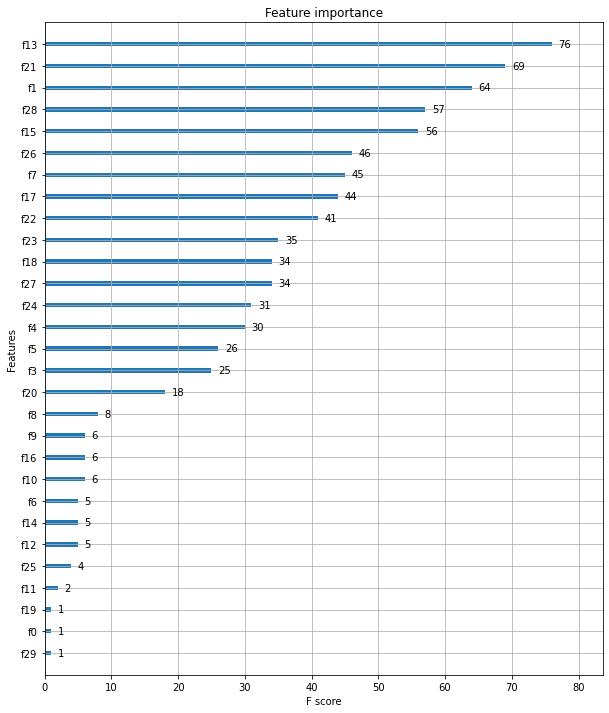

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)
#f0 : 첫번째 피쳐 ~

## 사이킷런 Wrapper XGBoost 개요 및 적용 

> eta > learning rate

> sub_sample > subsample

> lambda > reg_lambda

> alpha > reg_alpha


In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)

w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [ ]:
get_clf_eval(y_test , w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870,    F1: 0.9806, AUC:0.9951


In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)

evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                eval_set=evals, verbose=True)

ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [ ]:

get_clf_eval(y_test , ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870,    F1: 0.9744, AUC:0.9954


211~311까지 성능 평가 지수가 향상되지 않았기 때문에 더 이상 반복하지 않고 멈춤.

In [ ]:
# early_stopping_rounds를 10으로 설정하고 재 학습. 
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, 
                eval_metric="logloss", eval_set=evals,verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test , ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912


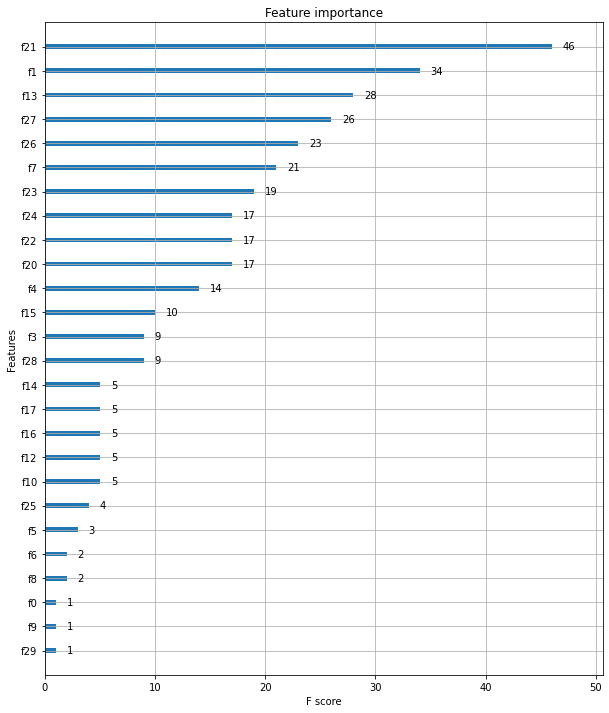

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(xgb_wrapper, ax=ax)

## LightGBM

여전히 Xgboost는 학습 시간이 오래 걸린다. GridSearchCV로 하이퍼 파라미터 튜닝을 수행하다 보면 수행 시간이 너무 오래 걸린다는 단점이 있다. 

> LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할 방식을 사용. 트리의 균형을 맞추지 않고,최대 손실 값을 가지는 리프 노드를 지속적으로 분할 하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리 생성 

**LightGBM 하이퍼 파라미터** 

> num_iterations : 반복 수행하려는 트리의 개수 지정.

> learning_rate 

> max_depth

> min_data_in_leaf : min_samples_leaf와 동일 

> num_leaves :하나의 트리가 가질 수 있는 최대 리프 개수

>boosting : 부스팅의 트리를 생성하는 알고리즘 기술 (gbdt,rf)

> bagging_fraction : 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율 

> feature_fration : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율 


**하이퍼 파라미터 튜닝 방안 **

num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf),max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안 




In [19]:
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

X_train,X_test,y_train,y_test = train_test_split(ftr,target,test_size=0.2,random_state=777)

#XGBoost와 동일하게 n_estimators는 400

lgbm_wrapper=LGBMClassifier(n_estimators =400)

#LightGBM에도 XGBoost와 동일하게 조기 중단 수행 가능 
evals =[(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set=evals,verbose=True)
preds=lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.573283	valid_0's binary_logloss: 0.573283
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.519484	valid_0's binary_logloss: 0.519484
[3]	valid_0's binary_logloss: 0.472958	valid_0's binary_logloss: 0.472958
[4]	valid_0's binary_logloss: 0.437086	valid_0's binary_logloss: 0.437086
[5]	valid_0's binary_logloss: 0.405053	valid_0's binary_logloss: 0.405053
[6]	valid_0's binary_logloss: 0.378001	valid_0's binary_logloss: 0.378001
[7]	valid_0's binary_logloss: 0.349636	valid_0's binary_logloss: 0.349636
[8]	valid_0's binary_logloss: 0.328866	valid_0's binary_logloss: 0.328866
[9]	valid_0's binary_logloss: 0.307363	valid_0's binary_logloss: 0.307363
[10]	valid_0's binary_logloss: 0.292376	valid_0's binary_logloss: 0.292376
[11]	valid_0's binary_logloss: 0.281797	valid_0's binary_logloss: 0.281797
[12]	valid_0's binary_logloss: 0.271082	valid_0's binary_logloss: 0.271082
[13]	valid_0's binary_logloss: 0.259612	valid_

In [20]:
get_clf_eval(y_test,preds,pred_proba)

오차 행렬
[[34  4]
 [ 5 71]]
정확도: 0.9211, 정밀도: 0.9467, 재현율: 0.9342,    F1: 0.9404, AUC:0.9841


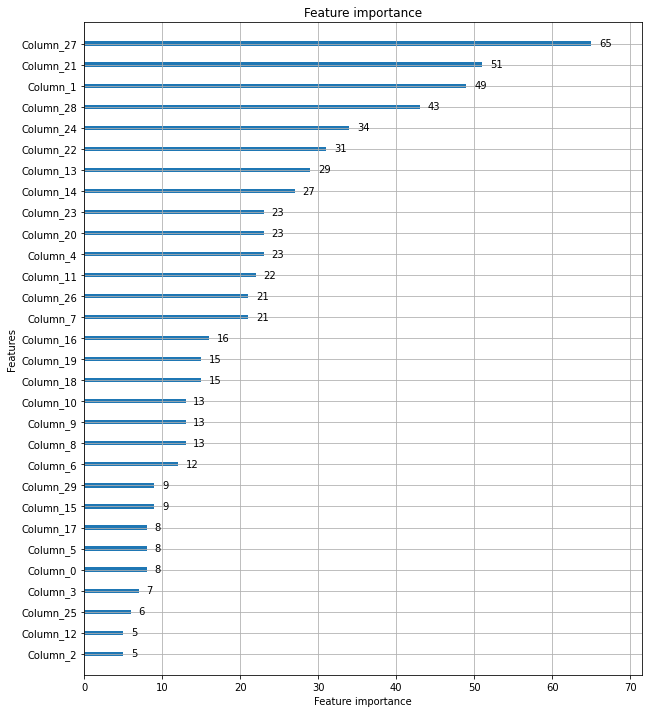

In [21]:
#plot_importance()를 이용해 피처 중요도 시각화 

from lightgbm import plot_importance
import matplotlib.pyplot as plt


fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)